In [307]:
import pandas as pd
import matplotlib.pyplot as plt

In [308]:
df = pd.read_csv('Assignment 2/problem_1/train.csv')

In [309]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


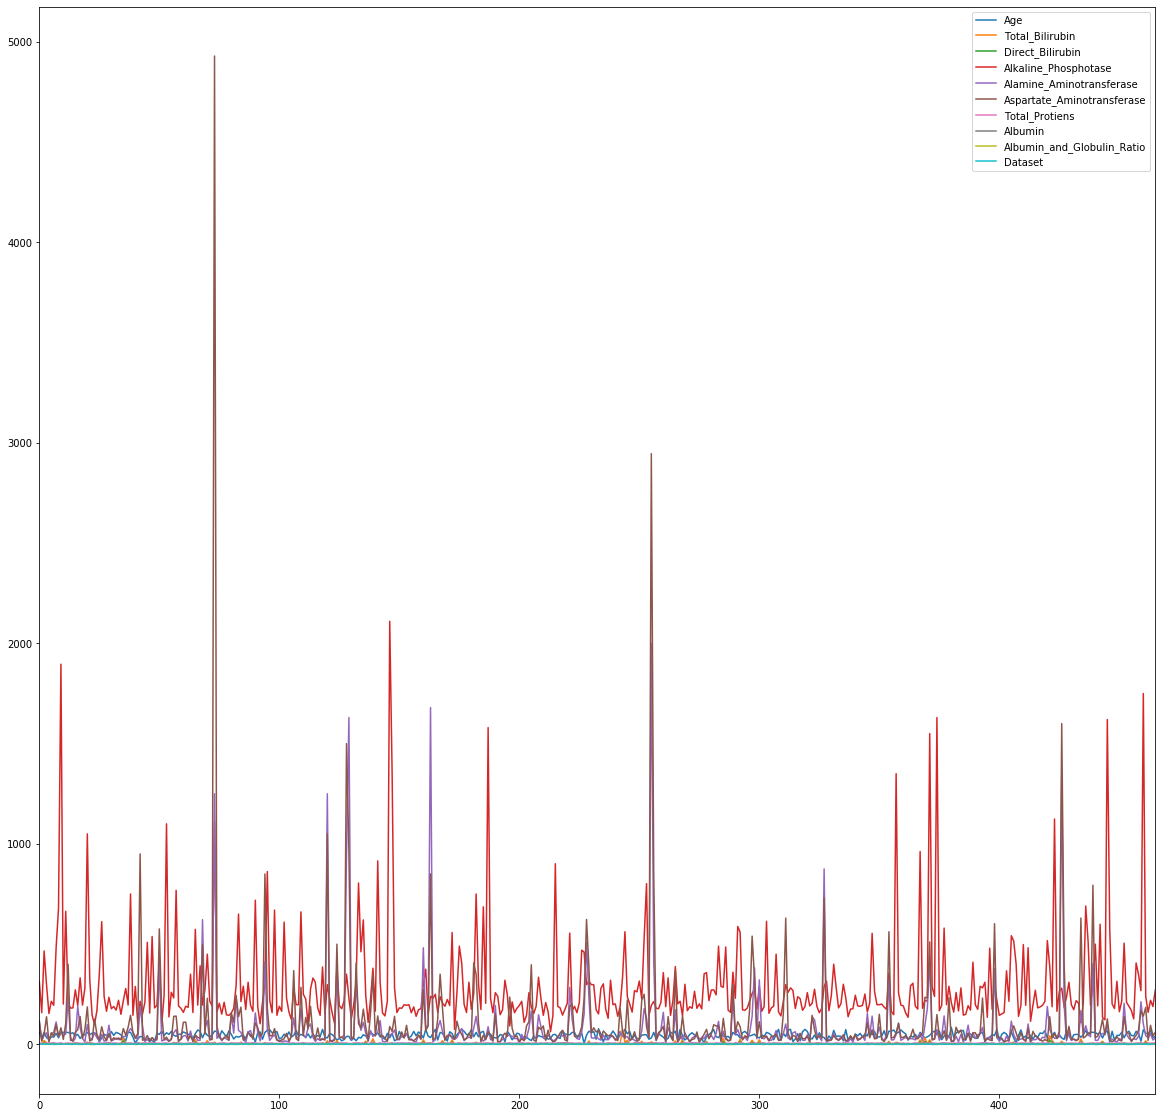

In [310]:
df.plot(figsize = (20,20))

In [311]:
df.Dataset.value_counts()

1    333
2    133
Name: Dataset, dtype: int64

In [312]:
mapping = {'Male': 1, 'Female': 0}
df.replace({'Gender': mapping},inplace=True)

In [313]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    3
Dataset                       0
dtype: int64

In [314]:
df.fillna(value=df.Alamine_Aminotransferase.mean(),inplace=True)

In [315]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,45.321888,0.774678,3.406438,1.503004,294.877682,82.633047,114.982833,6.491845,3.149356,1.479934,1.285408
std,15.697936,0.418243,6.510448,2.823700,252.718859,192.801900,312.869109,1.096455,0.805285,6.547910,0.452094
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,46.000000,1.000000,1.000000,0.300000,210.000000,36.000000,42.000000,6.600000,3.100000,1.000000,1.000000
75%,58.000000,1.000000,2.575000,1.300000,298.000000,60.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,85.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,82.633047,2.000000


In [316]:
df.columns.shape

(11,)

In [317]:
xcolumns = df.columns[:10]
X = df[xcolumns]
y = df['Dataset']

In [318]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1)

In [319]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [320]:
y_pred = model.predict(X_test)

In [321]:
(y_pred == y_test).sum()

86

In [322]:
y_pred.shape

(117,)

In [323]:
accuracy = 87/117

In [324]:
accuracy

0.7435897435897436

In [325]:
from sklearn.tree import DecisionTreeClassifier

In [326]:
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [327]:
y_pred = model2.predict(X_test)

In [328]:
(y_pred == y_test).sum()

68

In [329]:
70/117

0.5982905982905983

In [330]:
from sklearn.neighbors import KNeighborsClassifier

In [331]:
model3= KNeighborsClassifier()
model3.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [332]:
y_pred = model3.predict(X_test)
(y_pred == y_test).sum()/117

0.6752136752136753

In [333]:
df['globulin'] = df['Albumin']/df['Albumin_and_Globulin_Ratio']

In [334]:
df.Alkaline_Phosphotase = df.Alkaline_Phosphotase/df.Alkaline_Phosphotase.mean()
df.Alamine_Aminotransferase = df.Alamine_Aminotransferase/df.Alamine_Aminotransferase.mean()
df.Aspartate_Aminotransferase = df.Aspartate_Aminotransferase/df.Aspartate_Aminotransferase.mean()
df.Total_Bilirubin = df.Total_Bilirubin/df.Total_Bilirubin.mean()
df.Direct_Bilirubin = df.Direct_Bilirubin/df.Direct_Bilirubin.mean()
df.Age = df.Age/df.Age.mean()


In [335]:
# Age conversion to range
# Scaling of features
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,globulin
0,1.323864,1,1.849439,2.129069,1.064848,1.428000,0.991452,6.6,3.7,1.27,1,2.913386
1,0.683996,0,0.234849,0.133067,0.535815,0.254136,0.139151,6.0,3.0,1.00,1,3.000000
2,1.323864,1,5.753811,6.320674,1.580316,0.556678,0.452241,6.1,2.0,0.40,1,5.000000
3,0.750189,1,2.553988,2.661336,1.010589,0.701898,1.200179,5.8,2.4,0.70,1,3.428571
4,0.573674,0,0.264206,0.133067,0.522250,0.193627,0.104363,7.0,3.5,1.00,1,3.500000


In [336]:
X = df[['Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Bilirubin','Direct_Bilirubin']]
y = df['Dataset']

In [337]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1,test_size = 0.2)

In [338]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [339]:
y_pred = model.predict(X_test)

In [340]:
(y_pred == y_test).sum()

74

In [341]:
y_pred.shape

(94,)

In [342]:
74/94

0.7872340425531915